# Week 22 Homework

In [60]:
# Dependencies and modules:

import pandas as pd
import numpy as np
import time
from bs4 import BeautifulSoup as bs
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager

## 1.	Create a python function to scrape Yelp data for 50 restaurants close to you OR Craigslist for the top 50 items of any topic interesting to you. Think about what data you want to scrape aside from the name and location. You must pick at least three other fields. You can use beautiful soup, selenium, scrapy, and/or splinter as possible.

I decided to scrape for local restaurants! (And I endeavor to visit a new one each month!)

I will create and tune my code in notebook before running it in VS code or terminal. (turns out this was a bad instinct; you get much better error messages and prompts from VS Code)

In [59]:
# function to pull addresses by following the link for every entry.
# running by itself because it was giving me problems
addresses = []
        
# base url with zip code parameter placeholder:
url=f'https://www.yelp.com/search?find_desc=Restaurants&find_loc=62220'

executable_path = {'executable_path':ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=True) 
def locations():
    for page in range(1,51):

        page_url = url + f'&start={page}'
        soup = bs(browser.html, 'html.parser')

        browser.visit(page_url)
        time.sleep(2)
        # I have to follow each restaurant link to get their address:
        browser.links.find_by_partial_href('/biz/').click()
        time.sleep(2)
        loc = soup.find('p', class_='css-qyp8bo')
        if loc is None:
            loc = "Unavailable"
            addresses.append(loc)
        else:
            address = loc.contents[-1].strip()
            addresses.append(address)
            time.sleep(2)
 
    #return addresses
    
# define a function to scrape my desired items, plus calling location func: 
def scrape_food():
    call_addresses = locations()
    # These are lists for the items I want to scrape:
    call_addresses
    names = []
    pricing = []
    ratings = []
    nreviews = []
    
    # base url with zip code parameter placeholder:
    url=f'https://www.yelp.com/search?find_desc=Restaurants&find_loc=62220'

    executable_path = {'executable_path':ChromeDriverManager().install()}
    browser = Browser('chrome', **executable_path, headless=True) 
    
    # there are 10 entries per page, so I will step my range by 10:
    for page in range(0,50,10):
        
        page_url = url + f'&start={page}'
        browser.visit(page_url)
        soup = bs(browser.html, 'html.parser')
               
        try:
            # Getting the name:
            name_divs = soup.find_all("div", class_="businessName__09f24__EYSZE display--inline-block__09f24__fEDiJ border-color--default__09f24__NPAKY")
            for n in name_divs:
                name = n.find('a', class_='css-1422juy').text
                names.append(name)
           # Check to make sure I'm getting stuff: 
            #print(len(names))
            

            # Price range:
            para = soup.find_all('p', class_='css-1gfe39a')
            for span in para:
                prices = span.find('span', class_='css-1e4fdj9').text
                pricing.append(prices)
            
            #print(len(pricing))
            
            # Rating:
            rating_divs = soup.find_all("div", class_="attribute__09f24__hqUj7 display--inline-block__09f24__fEDiJ margin-r1__09f24__rN_ga border-color--default__09f24__NPAKY")
            for d in rating_divs:
                for x in d:
                    stars = x.div['aria-label']
                    ratings.append(stars)
            
                #print(len(ratings))
            
            # Number of reviews:
            review_divs = soup.find_all("div", class_="attribute__09f24__hqUj7 display--inline-block__09f24__fEDiJ border-color--default__09f24__NPAKY")
            for r in review_divs:
                reviews = r.find('span', class_="reviewCount__09f24__tnBk4 css-1e4fdj9").text
                nreviews.append(reviews)
            
            #print(len(nreviews))            

        except Exception as e:
            print(e)
    
   
    # Let's make a nice dictionary out of our bunch of lists:
    food_scrape_dict = {'Rank':np.arange(1,51,1),
                        'Retaurant Name':names,
                        'Location': addresses,                    
                        'Price Point':pricing, 
                        'Rating':ratings, 
                        'No. of Reviews':nreviews}

    food_scrape_df = pd.DataFrame({k:pd.Series(v) for k,v in food_scrape_dict.items()})
    food_scrape_df.set_index("Rank",inplace=True)
    return food_scrape_df

scrape_food()



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\Nik\.wdm\drivers\chromedriver\win32\98.0.4758.102]


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\Nik\.wdm\drivers\chromedriver\win32\98.0.4758.102]


,Retaurant Name,Location,Price Point,Rating,No. of Reviews
Rank,,,,,
1,BEAST Craft BBQ,Unavailable,$$,4.5 star rating,590
2,The Country Cafe,"1550 East St Rt 15 Belleville, IL 62221",,3.5 star rating,4
3,Reifschneider’s Grill & Grape,"700 N State St Freeburg, IL 62243",$$,4 star rating,62
4,Valentine’s Restaurant,"205 S State St Freeburg, IL 62243",$$,4 star rating,31
5,Copper Fire Bar & Eatery,"200 E Main St Belleville, IL 62220",$$,3 star rating,107
6,Clara B’s Kitchen Table,"106 E Main St Belleville, IL 62220",Belleville,5 star rating,5
7,Eckert’s Country Store & Farms,"951 S Green Mount Rd Belleville, IL 62220",$$,4 star rating,399
8,Tavern On Main,"301 E Main St Belleville, IL 62220",$$,4 star rating,135
9,C And C Food For Your Soul,"1926 West Main St Belleville, IL 62226",,5 star rating,13


## 2.	Create a local API that calls your scrape function and stores the data when you call /scrape endpoint. The data you scrape should be viewable when you go to /all .

##### All code is included in files in GitHub Week_22 repository: https://github.com/N-J-Miller/Week_22.git

### Home Page:

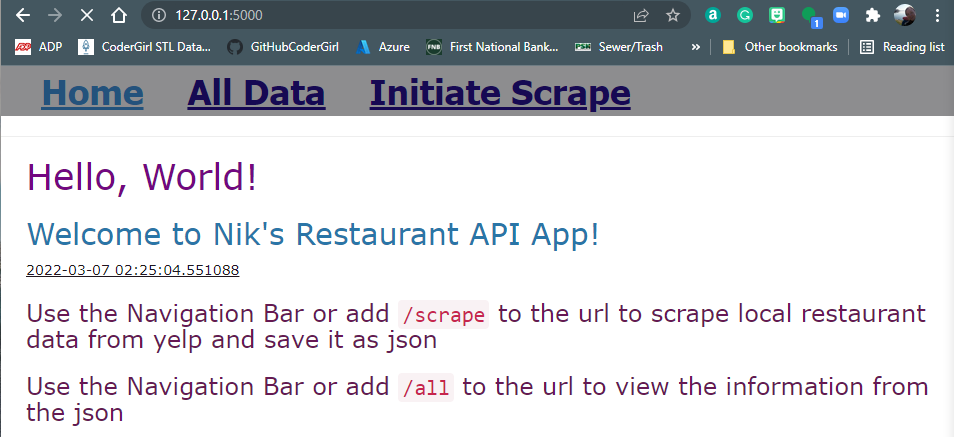

### Endpoint /scrape:

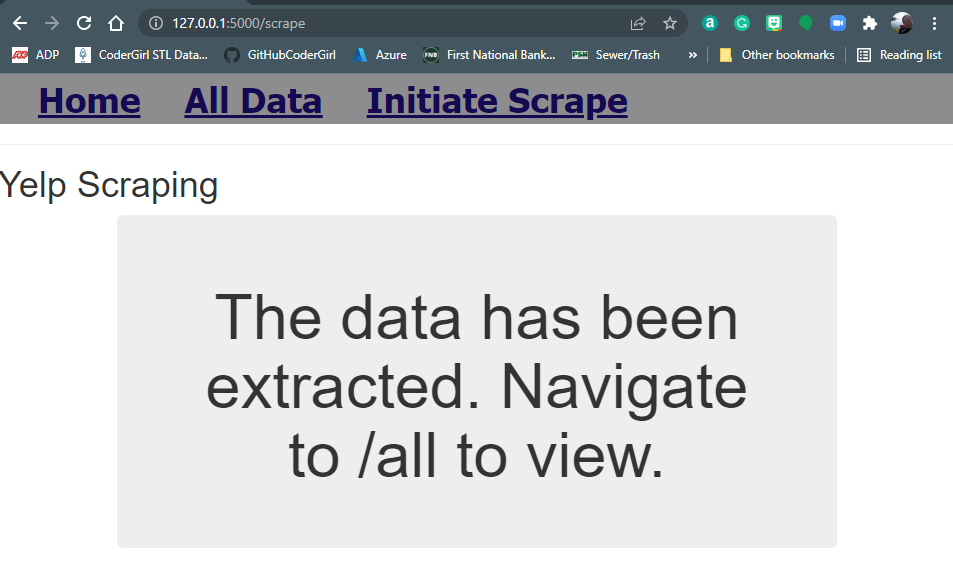

### Endpoint /all:
(I figure you can tell from code above that I did scrape 50 restaurants so I didn't zoom out any further)

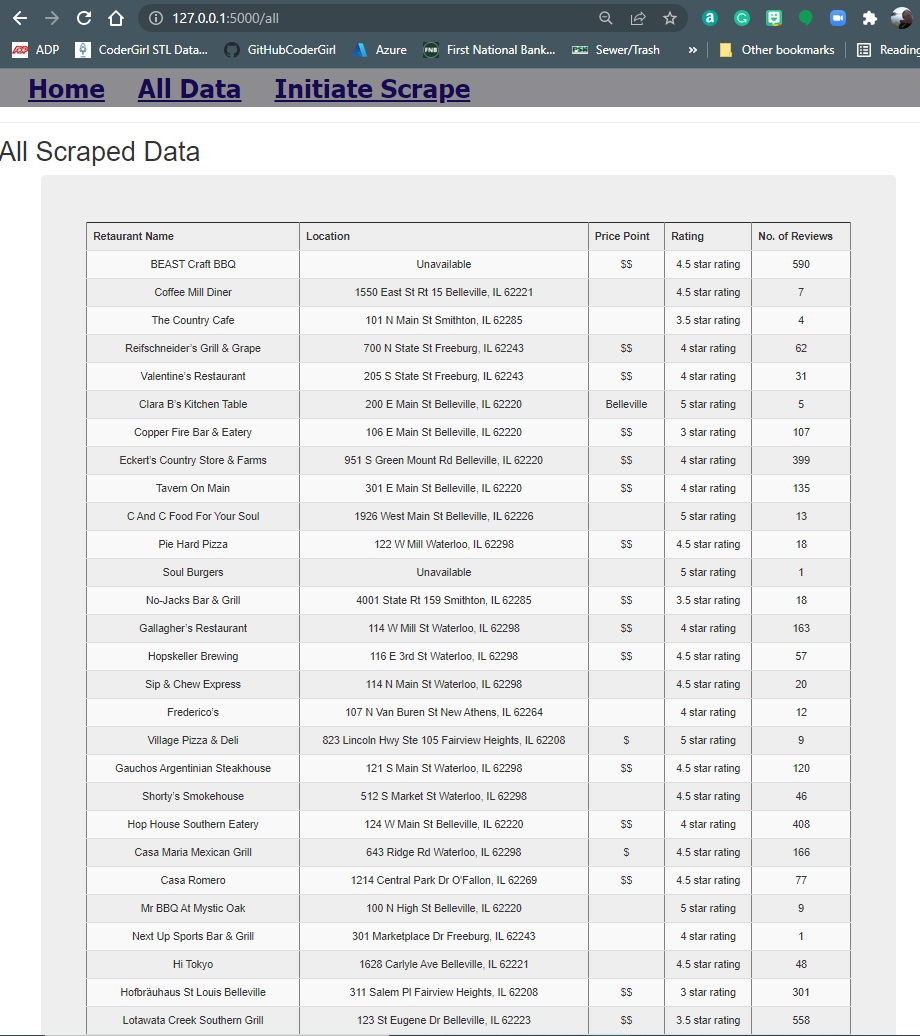

## 3.	What is web scraping? Why is it helpful? What does it mean for your online presence? Refence the readings and DataCamp. 

Web scraping is creating code to programatically extract data from web pages. This has redefined, if not first-world society, then certainly its economy and science. Even the US Congressional Library is using web scraping to preserve Tweets as part of an enormous anthropological posterity project! Never before has so much data been published, collected, and analyzed so quickly. 

What this means for my online presence is that companies will pay money for all kinds of information about who I am and what I do electronically to include in studies, research, and (MOSTLY) marketing, and that if I do not scrupulously secure my data and adopt a cookie-free electronic diet, I will be targeted for ads about online ADHD counseling, dog toys, tall-size pants, and mature singles dating sites. Hypothetically. 😅

# DataCamp Completions:

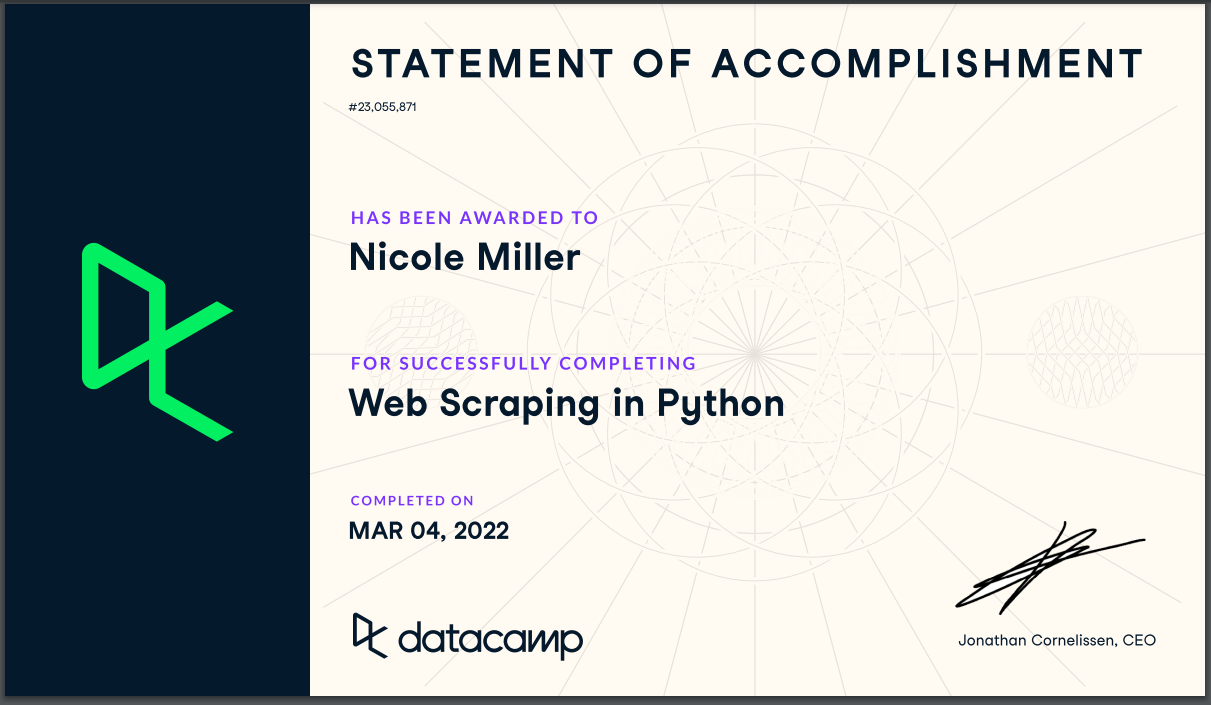

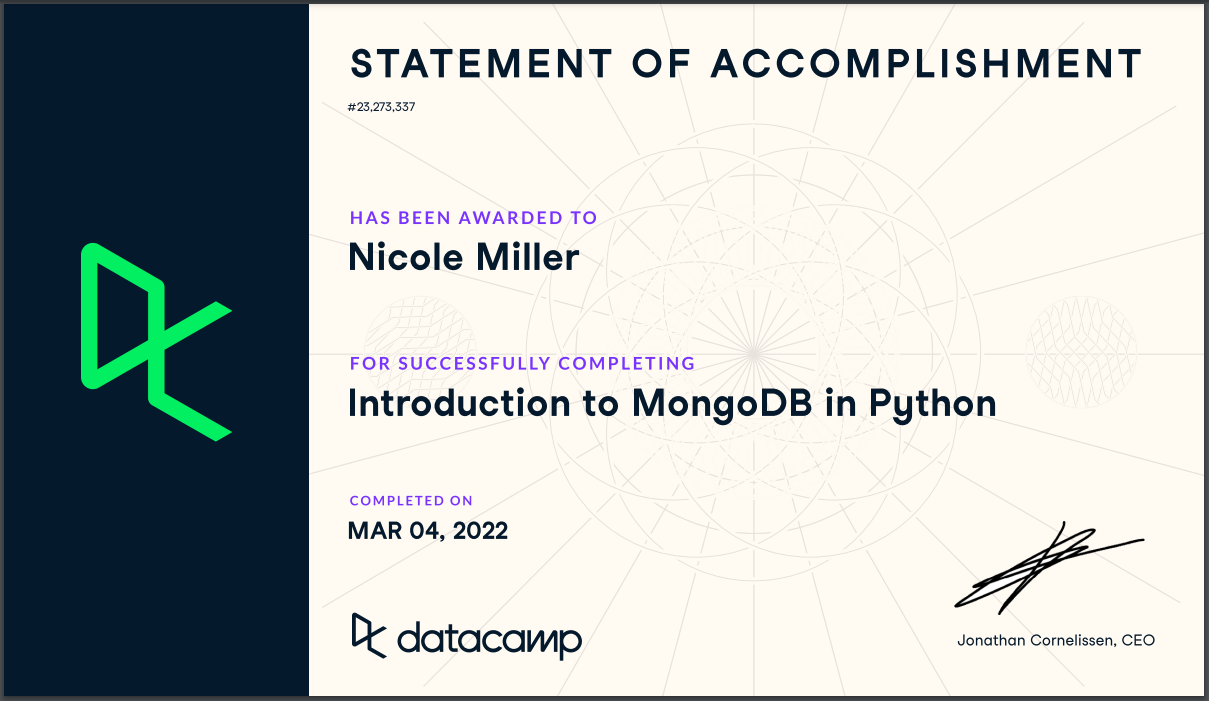